In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [4]:
def trend(time, slope=0):
    return time*slope

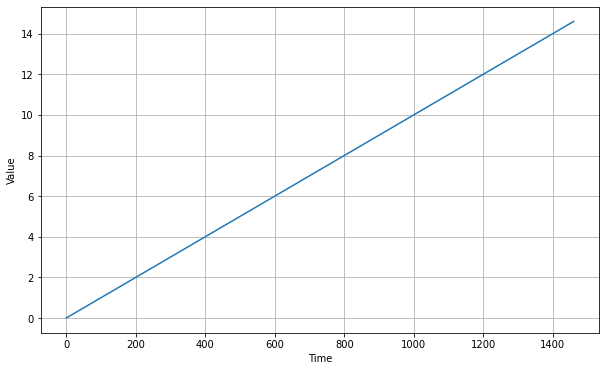

In [5]:
time=np.arange(4*365+1)
baseline=1
series=trend(time, 0.01)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [6]:
def seasonal_pattern(season_time):
    return np.where(season_time<0.4,
                   np.cos(season_time*2*np.pi),
                   1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time=((time+phase)%period)/period
    return amplitude*seasonal_pattern(season_time)

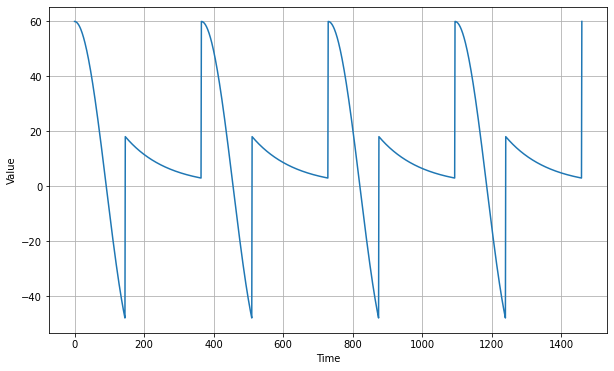

In [12]:
baseline=10
amplitude=60
series=seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

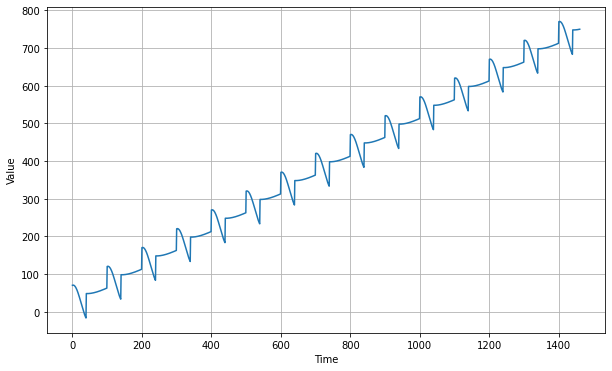

In [14]:
slope=0.5
series=baseline+trend(time, slope)+seasonality(time, period=100, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [15]:
def white_noise(time, noise_level=1, seed=None):
    rnd=np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

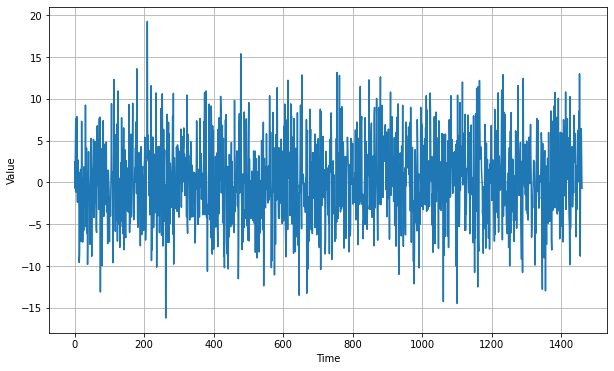

In [17]:
noise_level=5
noise=white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

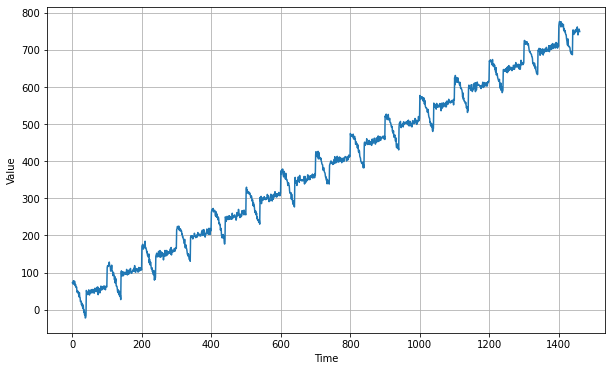

In [18]:
series+=noise
plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [19]:
split_time=1000
time_train=time[:split_time]
x_train=series[:split_time]
time_valid=time[split_time:]
x_valid=series[split_time:]

In [20]:
def autocorrelation(time, amplitde, seed=None):
    rnd=np.random.RandomState(seed)
    φ1 = 0.5
    φ2 = -0.1
    ar = rnd.randn(len(time) + 50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += φ1 * ar[step - 50]
        ar[step] += φ2 * ar[step - 33]
    return ar[50:] * amplitude

In [21]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

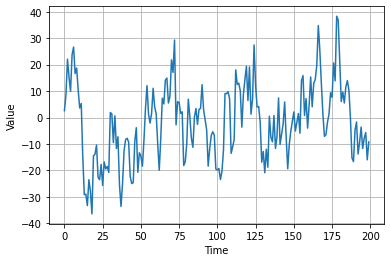

In [22]:
series = autocorrelation(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()